In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.2-py2.py3-none-any.whl size=13376 sha256=3d527fa4d44da254df877b2dad641801f770b205e0f94584b900116f93fc7d61
  Stored in directory: /root/.cache/pip/wheels/c2/60/55/ec507bce8e8ccb516954accf661ee60c8b34198fafdfb81872
Successfully built pytesseract


In [ ]:
import cv2
import imutils
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

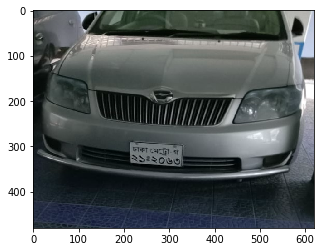

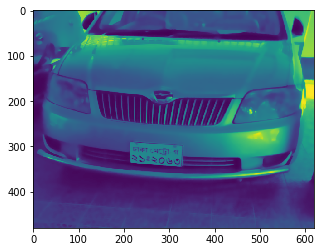

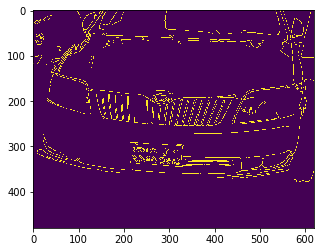

In [ ]:
img = cv2.imread('tiiis.jpg',cv2.IMREAD_COLOR)

img = cv2.resize(img, (620,480) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection

cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
implot=plt.imshow(img)
plt.show()
implot=plt.imshow(gray)
plt.show()
implot=plt.imshow(edged)
plt.show()

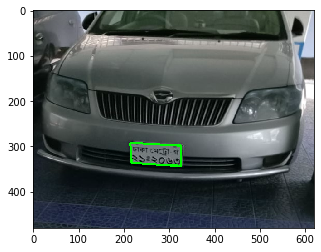

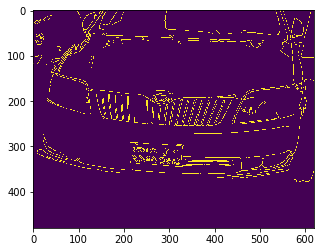

In [ ]:

for c in cnts:
 
 peri = cv2.arcLength(c, True)
 approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
 
 if len(approx) == 4:
  screenCnt = approx
  break
if screenCnt is None:
  detected = 0
  print ("No contour detected")
else:
  detected = 1

if detected == 1:
 cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

imgplot= plt.imshow(img)
plt.show()
imgplot= plt.imshow(edged)
plt.show()

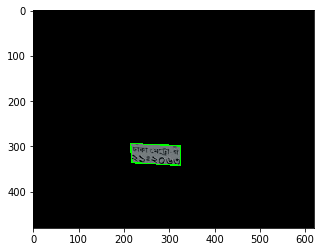

In [ ]:

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
imgplot= plt.imshow(new_image)
plt.show()

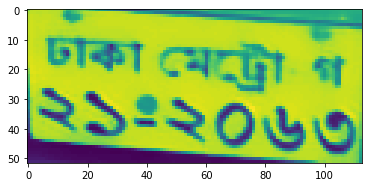

In [ ]:

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
imgplot= plt.imshow(Cropped)
plt.show()



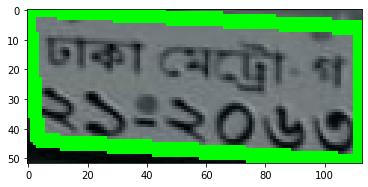

In [ ]:
Cropped = img[topx:bottomx+1, topy:bottomy+1]
imgplot= plt.imshow(Cropped)
plt.show()

In [ ]:
Cropped = cv2.resize(Cropped, (620,480) )

cv2.imwrite( 'cropped1.png', Cropped )

True

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,794 kB/s)
debconf: unable to initia

In [ ]:
!pip install pytesseract

In [ ]:
#pytesseract.pytesseract.tesseract_cmd=/root/.cache/pip/wheels/01/84/d2/10729e740ad8f5c5d3b02d10c7f15afeaa390f7723bd59dbd7
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("Detected Number is:",text)

Detected Number is: 


In [ ]:
import pytesseract
from PIL import Image
import cv2

img = cv2.imread('1.png',cv2.IMREAD_COLOR) #Open the image from which charectors has to be recognized
#img = cv2.resize(img, (620,480) ) #resize the image if required

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey to reduce detials
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise

original = pytesseract.image_to_string(gray, config='')
#test = (pytesseract.image_to_data(gray, lang=None, config='', nice=0) ) #get confidence level if required
#print(pytesseract.image_to_boxes(gray))

print (original)

Explain
that
Stuff!
01234547890


In [ ]:
!pip install exifread

  Created wheel for exifread: filename=ExifRead-2.1.2-cp36-none-any.whl size=34200 sha256=084e9de88e9268fb70bd3b121dc09ee173b44ebb1bb92eb33a6eb3aacbc35cbe
  Stored in directory: /root/.cache/pip/wheels/a2/82/de/fd5f70739a3c8d7475cc21f4e186150abbc5d77180af7d94a2
Successfully built exifread


In [ ]:
import exifread
tags = exifread.process_file(open('b.jpg', 'rb'))
geo = {i:tags[i] for i in tags.keys() if i.startswitch('GPS')}
print(geo["GPS GPSLatitude"])
print(geo["GPS GPSLongitude"])
print(geo["GPS GPSDate"]) 

KeyError: ignored

In [ ]:
from PIL import Image
import pytesseract
import cv2
#import cv
img= cv2.imread('cropped1.png')
tex=pytesseract.image_to_string(Image.open('cropped1.png'), lang='ben')
print(pytesseract.image_to_string(Image.open('cropped1.png'), lang='ben'))
cv2.namedWindow("input image")
cv2.imshow("input image",img)
cv2.waitkey(0)
cv2.destroyWindow("Test")
cv2.destroyWindow("Main")

TesseractError: ignored